Pablo Cuesta Sierra

# ** Laboratorio 2020-21 ** #

## Dinámica de poblaciones: matrices de Markov ##


**EJERCICIO 1.**
Estamos diseñando el sistema de ascensores de un rascacielos.

La empresa que los fabrica nos dice que cada día tendrán que parar, por avería o mantenimiento, el $10\%$ de los ascensores que estuviesen funcionando el día anterior, y que el $70\%$ de los ascensores que estén parados en un día dado volverán a estar operativos al día siguiente.

**a)**  Tras el periodo inicial de ajuste, ¿llegaremos a un régimen estable de funcionamiento de los ascensores? (*Sugerencia:* Estudiar la evolución del modelo matricial para este problema.)

**b)** ¿Cuántos ascensores tendremos que instalar en el rascacielos si queremos que haya habitualmente 15 en condiciones de funcionar?

*Comentario:* Las matrices con todas las entradas $\ge 0$ y  tales que la suma de los elementos de cada columna es 1 se llaman **matrices de Markov**. Como vas a ver en este ejemplo, los problemas de dinámica de poblaciones que tienen una matriz de Markov como *matriz de transición* tienen la propiedad adicional de que **la población total es constante**.


Activos: $X_{n+1}=0.9X_n+0.7Y_n$

Parados: $Y_{n+1}=0.1X_n+0.3Y_n$

In [9]:
M=matrix(RDF,2,[.9,.7,.1,.3])
show(M.n(digits=1))

[0.90 0.70]
[0.10 0.30]

$X_{n+1}=0.9X_n+0.7Y_n\geq 15$, $X_n=15$

$\Rightarrow X_n=15, Y_n\geq 15/7>2  \Rightarrow X_n=15, Y_n=3, X_n+Y_n=18$, como mínimo

In [111]:
XY=[(15,3)]

for j in range(50):
    XY+=[M*vector(XY[-1])]

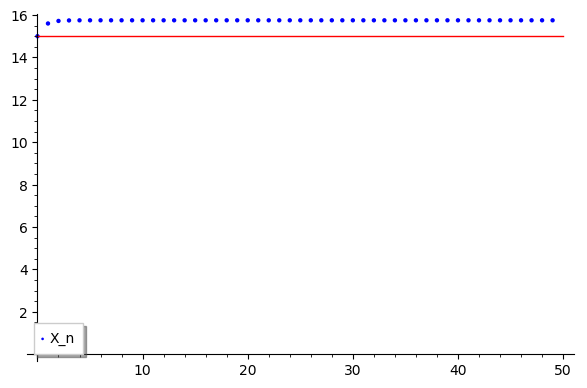

In [112]:
points([(j,XY[j][0]) for j in range(50)], ymin=0, legend_label='X_n')+plot(15,xmin=0,xmax=50, color='red')

<p><span style="color: #ff0000;"><strong>EJERCICIO 2.</strong></span>&nbsp;<strong>Otra matriz de Markov.&nbsp;</strong></p>
<p>En una parcela dedicada a la explotaci&oacute;n forestal, los &aacute;rboles se clasifican seg&uacute;n su tama&ntilde;o en tres tipos: Peque&ntilde;os, Medianos y Grandes.&nbsp;</p>
<p>Cada periodo de 5 a&ntilde;os, la evoluci&oacute;n del bosque es la siguiente:&nbsp;</p>
<ul>
<li>El 20% de los &aacute;rboles Peque&ntilde;os no han crecido lo suficiente, y siguen siendo Peque&ntilde;os. El 70% han pasado a la categor&iacute;a de Medianos, y un 10% ha tenido un crecimiento excepcional que les hace pasar a la categor&iacute;a de Grandes.&nbsp;</li>
<li>El 10% de los &aacute;rboles Medianos siguen siendo Medianos, y el 90 % restante pasan a ser Grandes.&nbsp;</li>
<li>Se tala el 80% de los &aacute;rboles Grandes.</li>
<li>Se plantan tantos &aacute;rboles Peque&ntilde;os como &aacute;rboles Grandes han sido talados.&nbsp;</li>
<li>Se considera que ning&uacute;n &aacute;rbol muere por ninguna otra causa que no sea la tala.</li>
</ul>
<p>&nbsp;<strong>Comentario:</strong> Observa que, de nuevo,&nbsp;como se plantan tantos &aacute;rboles como son talados, el n&uacute;mero total de &aacute;rboles es constante en cada periodo de 5 a&ntilde;os. Estamos de nuevo ante una matriz de Markov.&nbsp;</p>
<p><strong><span style="color: #ff0000;">a)</span></strong> Denotando por $P_N, M_N, G_N $ el n&uacute;mero de &aacute;rboles en cada categor&iacute;a en el <strong>lustro</strong> $N$ (lustro = 5 años), formula matricialmente el sistema y estudia su evoluci&oacute;n a largo plazo, para determinar qu&eacute; porcentaje de &aacute;rboles estar&aacute; en cada una de las clases.</p>


$$P_{n+1}=0.2P_n+0.8G_n$$
$$M_{n+1}=0.7P_n+0.1M_n$$
$$G_{n+1}=0.1P_n+0.9M_n+.2G_n$$

In [113]:
M2=matrix(RDF, 3, [.2,0,.8,.7,.1,0,.1,.9,.2])
show(M2) #la matriz de Markov que describe este modelo

[0.2 0.0 0.8]
[0.7 0.1 0.0]
[0.1 0.9 0.2]

In [114]:
a,b,c=100,0,0
total=a+b+c
PMG=[(a,b,c)] #valores iniciales-no es muy relevante su valor
for j in range(100):
    PMG+=[M2*vector(PMG[-1])]

In [118]:
#calculamos las proporciones
CPMG=[(PMG[j][0]/total,PMG[j][1]/total,PMG[j][2]/total) for j in range(100)]

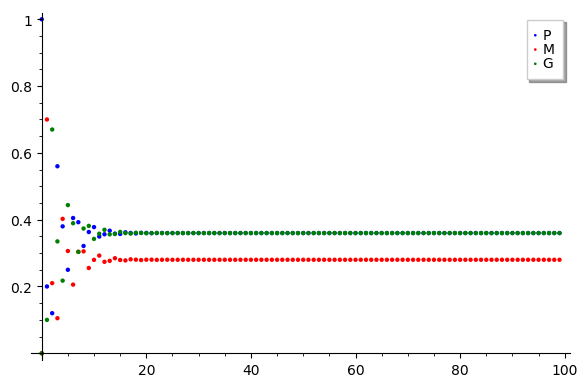

In [123]:
points([(j,CPMG[j][0]) for j in range(100)], legend_label='P')+\
points([(j,CPMG[j][1]) for j in range(100)],color='red', legend_label='M')+\
points([(j,CPMG[j][2]) for j in range(100)],color='green', legend_label='G')

In [125]:
#estas proporciones corresponden al autovector de autovalor 1, estandarizado
vectores=M2.eigenvectors_right()
vectores

[(1.0000000000000004,
  [(0.6195855517393625, 0.4818998735750602, 0.6195855517393629)],
  1),
 (-0.24999999999999997 + 0.6614378277661476*I,
  [(0.5897678246195885, -0.25802342327107025 - 0.48761843600343374*I, -0.33174440134851846 + 0.4876184360034337*I)],
  1),
 (-0.24999999999999997 - 0.6614378277661476*I,
  [(0.5897678246195885, -0.25802342327107025 + 0.48761843600343374*I, -0.33174440134851846 - 0.4876184360034337*I)],
  1)]

In [126]:
prop_limit=vectores[0][1]
x,y,z=prop_limit[-1]
proporciones_limite=(x/(x+y+z),y/(x+y+z),z/(x+y+z))
proporciones_limite #estos valores corresponden con los 
                    #límites que se ven en la gráfica 
                    #que hemos hecho anteriormente: (.36,.28,.36)

(0.3599999999999997, 0.2800000000000001, 0.36)

<p><strong><span style="color: #ff0000;">b)</span></strong> Por consideraciones de tipo paisaj&iacute;stico, se desea que a largo plazo el porcentaje de &aacute;rboles grandes sea del 50%. Ajusta *a mano* el porcentaje de tala para cumplir este objetivo.&nbsp;</p>



In [127]:
var('t')
Mt=matrix(SR, 3, [.2,0,t,.7,.1,0,.1,.9,1-t])
show(Mt)

[0.200000000000000                 0                 t]
[0.700000000000000 0.100000000000000                 0]
[0.100000000000000 0.900000000000000            -t + 1]

In [128]:
t=.45 #probando varios valores, este se acerca mucho
Mt=matrix(SR, 3, [.2,0,t,.7,.1,0,.1,.9,1-t])
Mt^30*vector((100,0,0))

(28.1250002701242, 21.8750005586455, 49.9999991712304)

<p><strong><span style="color: #ff0000;">c)</span></strong> Calcula el porcentaje de tala correcto hallado en el apartado anterior de otro modo que no sea *a ojo*.&nbsp;</p>



In [129]:
var('t')
Mt=matrix(SR, 3, [.2,0,t,.7,.1,0,.1,.9,1-t])
show(Mt)

[0.200000000000000                 0                 t]
[0.700000000000000 0.100000000000000                 0]
[0.100000000000000 0.900000000000000            -t + 1]

In [130]:
vectores=Mt.eigenvectors_right()
vectores[2] #este ese el de autovalor 1

(1, [(1, 7/9, 4/5/t)], 1)

In [131]:
v=vectores[2][1]
v=v[-1]
v

(1, 7/9, 4/5/t)

In [132]:
solve(v[2]/(v[0]+v[1]+v[2])==0.5,t)

[t == (9/20)]

**SI QUIERES PRACTICAR MÁS**

*Resuelve usando Sage los problemas 7, 8 y 9 de la Hoja 10 de problemas de Álgebra Lineal (puedes descargarlos en el moodle de Laboratorio).*